<a href="https://colab.research.google.com/github/gustavo159753/Analise-de-dados/blob/main/sqlite3_principles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3 # Importa a biblioteca sqlite3 para trabalhar com bancos de dados SQLite.

import pandas as pd # Importa a biblioteca pandas para manipulação e análise de dados (DataFrames).

import matplotlib.pyplot as plt # Importa matplotlib para criação de gráficos básicos.

import seaborn as sns # Importa seaborn para criação de gráficos estatísticos mais avançados e esteticamente agradáveis.

import warnings # Importa o módulo warnings para gerenciar avisos.

warnings.filterwarnings("ignore") # Ignora mensagens de aviso para não poluir a saída do notebook.

In [ ]:
conn = sqlite3.connect("customer_data.db") # Conecta ao banco de dados SQLite 'customer_data.db'. Se não existir, ele será criado.

cursor = conn.cursor() # Cria um objeto cursor, que permite executar comandos SQL.

cursor.execute("""
CREATE TABLE IF NOT EXISTS customers (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    age INTEGER,
    city TEXT,
    total_spent_ REAL
)
""") # Executa o comando SQL para criar a tabela 'customers' se ela ainda não existir.

conn.commit() # Confirma as alterações no banco de dados, salvando a criação da tabela.

In [ ]:
customers = [
    ("Gustavo Aguiar", 28, "Vilhena", 132.75),
    ("Maurina Aguiar", 40, "Cerejeiras", 444.55),
    ("Heberty Aguair Siqueira", 33, "Cerejeiras", 136.55),
    ("Antonio Gilmar Jose Siqueira", 53, "Ariquemes", 953.55),
    ("Ana Paula Silva", 25, "Vilhena", 210.30),
    ("Carlos Eduardo Santos", 34, "Porto Velho", 512.90),
    ("Fernanda Lima", 29, "Ji-Paraná", 98.40),
    ("Marcos Vinicius Rocha", 41, "Cacoal", 745.00),
    ("Juliana Mendes", 36, "Rolim de Moura", 389.99),
    ("Rafael Nogueira", 22, "Ariquemes", 120.00),
    ("Patricia Oliveira", 45, "Guajará-Mirim", 860.75),
    ("Bruno Henrique Alves", 31, "Vilhena", 276.10),
    ("Luciana Pires", 38, "Cerejeiras", 433.80),
    ("Daniel Costa", 27, "Porto Velho", 154.60),
    ("Renata Freitas", 33, "Ji-Paraná", 310.25),
    ("Felipe Moreira", 26, "Cacoal", 89.90),
    ("Sandra Regina Lopes", 50, "Rolim de Moura", 980.00),
    ("Thiago Araujo", 35, "Ariquemes", 415.70),
    ("Camila Torres", 24, "Vilhena", 67.40),
    ("Leonardo Batista", 42, "Guajará-Mirim", 702.30),
    ("Michele Ribeiro", 28, "Cerejeiras", 198.50),
    ("Rodrigo Farias", 37, "Porto Velho", 560.90),
    ("Tatiane Cunha", 31, "Ji-Paraná", 245.00),
    ("Eduardo Martins", 48, "Cacoal", 820.60),
    ("Vanessa Barros", 29, "Rolim de Moura", 132.00),
    ("Diego Pacheco", 34, "Ariquemes", 377.45),
    ("Aline Guedes", 27, "Vilhena", 99.99),
    ("Paulo Henrique Lima", 39, "Guajará-Mirim", 640.80),
    ("Bianca Soares", 23, "Cerejeiras", 55.20),
    ("João Pedro Neves", 32, "Porto Velho", 410.00),
    ("Eliane Monteiro", 46, "Ji-Paraná", 905.30),
    ("Lucas Teixeira", 21, "Cacoal", 78.60),
    ("Simone Cardoso", 44, "Rolim de Moura", 690.40),
    ("Igor Malheiros", 30, "Ariquemes", 250.00),
    ("Cristiane Moraes", 35, "Vilhena", 488.90),
    ("Anderson Peixoto", 41, "Guajará-Mirim", 730.15),
    ("Priscila Rangel", 26, "Cerejeiras", 110.80),
    ("Alexandre Fonseca", 52, "Porto Velho", 999.99),
    ("Larissa Pontes", 28, "Ji-Paraná", 205.60),
    ("Henrique Macedo", 33, "Cacoal", 312.45),
    ("Rosana Furtado", 47, "Rolim de Moura", 875.00),
    ("Vinicius Lobo", 24, "Ariquemes", 95.30),
    ("Daniela Rezende", 38, "Vilhena", 540.70),
    ("Sergio Almeida", 55, "Guajará-Mirim", 920.00),
    ("Natalia Queiroz", 29, "Cerejeiras", 180.90),
    ("Matheus Prado", 34, "Porto Velho", 360.20),
    ("Adriana Valente", 43, "Ji-Paraná", 770.80),
    ("Renan Guimarães", 27, "Cacoal", 140.00),
    ("Claudia Meireles", 51, "Rolim de Moura", 890.60),
    ("Pedro H. Ribeiro", 31, "Ariquemes", 299.99),
    ("Elaine Souto", 36, "Vilhena", 455.50),
    ("Fábio Kuster", 48, "Guajará-Mirim", 810.40),
    ("Isabela Rios", 22, "Cerejeiras", 65.00),
    ("Rogério França", 40, "Porto Velho", 620.30),
    ("Silvia Bastos", 34, "Ji-Paraná", 315.75),
    ("Caio Ventura", 28, "Cacoal", 185.20),
    ("Denise Albuquerque", 49, "Rolim de Moura", 940.90),
    ("Guilherme Paes", 26, "Ariquemes", 115.80),
    ("Mariana Coutinho", 37, "Misissip", 505.00),
    ("Nelson Barcellos", 58, "Guajará-Mirim", 870.25),
    ("Beatriz Falcão", 24, "Cerejeiras", 72.10),
    ("Otavio Salles", 35, "Porto Velho", 430.60),
    ("Helena Braga", 42, "Ji-Paraná", 790.45),
    ("Samuel Corrêa", 29, "Cacoal", 160.90),
    ("Lúcia Brandão", 54, "Rolim de Moura", 915.00),
    ("Jonas Medeiros", 33, "Ariquemes", 280.75),
    ("Raquel Nascimento", 27, "Vilhena", 125.40),
    ("Everaldo Tavares", 46, "Guajará-Mirim", 860.60),
    ("Sabrina Lemos", 31, "Cerejeiras", 240.00),
    ("Douglas Antunes", 38, "Porto Velho", 590.90),
    ("Flavia Paiva", 35, "Ji-Paraná", 335.30),
    ("Murilo Abreu", 23, "Cacoal", 82.50),
    ("Teresa Pacheco", 57, "Rolim de Moura", 970.80),
    ("Yago Freire", 28, "Ariquemes", 150.00),
    ("Patrícia Dorneles", 41, "Vilhena", 680.20),
    ("Ronaldo Siqueira", 50, "Guajará-Mirim", 905.90),
    ("Kelly Muniz", 34, "Mississip", 410.10),
    ("Victor Holanda", 26, "Porto Velho", 190.00),
    ("Monica Seabra", 45, "Ji-Paraná", 830.40),
    ("Alan Figueiredo", 32, "Cacoal", 275.60),
    ("Rita Magalhães", 56, "Rolim de Moura", 950.75),
    ("Pablo Moretto", 29, "Ariquemes", 165.80),
    ("Carolina Xavier", 37, "Vilhena", 520.00),
    ("Osvaldo Cunha", 60, "Guajará-Mirim", 990.00)
]# Lista de tuplas, onde cada tupla representa um cliente com seus dados.

In [ ]:
cursor.executemany ("INSERT INTO customers (name, age, city, total_spent_) VALUES (?, ?, ?, ?)", customers) # Insere múltiplos registros na tabela 'customers' de uma vez. Os '?' são placeholders para os valores da lista 'customers'.

conn.commit() # Confirma a inserção de todos os dados no banco de dados.

In [ ]:
query = "SELECT * FROM customers" # Define a consulta SQL para selecionar todos os dados da tabela 'customers'.

df = pd.read_sql(query, conn) # Executa a consulta SQL e carrega os resultados em um DataFrame do pandas chamado 'df'.

df.head() # Exibe as primeiras 5 linhas do DataFrame para verificar os dados.

,id,name,age,city,total_spent_
0,1,Gustavo Aguiar,28,Vilhena,132.75
1,2,Maurina Aguiar,40,Cerejeiras,444.55
2,3,Heberty Aguair Siqueira,33,Cerejeiras,136.55
3,4,Antonio Gilmar Jose Siqueira,53,Ariquemes,953.55
4,5,Ana Paula Silva,25,Vilhena,210.30


In [ ]:
query = "SELECT * FROM customers WHERE total_spent_ > 200" # Define uma consulta SQL para selecionar clientes que gastaram mais de 200.

pd.read_sql(query, conn) # Executa a consulta e exibe os resultados em um DataFrame do pandas.

,id,name,age,city,total_spent_
0,2,Maurina Aguiar,40,Cerejeiras,444.55
1,4,Antonio Gilmar Jose Siqueira,53,Ariquemes,953.55
2,5,Ana Paula Silva,25,Vilhena,210.30
3,6,Carlos Eduardo Santos,34,Porto Velho,512.90
4,8,Marcos Vinicius Rocha,41,Cacoal,745.00
...,...,...,...,...,...
111,163,Monica Seabra,45,Ji-Paraná,830.40
112,164,Alan Figueiredo,32,Cacoal,275.60
113,165,Rita Magalhães,56,Rolim de Moura,950.75
114,167,Carolina Xavier,37,Vilhena,520.00


In [ ]:
query = "SELECT AVG(age) AS avarage_age FROM customers" # Define uma consulta SQL para calcular a idade média dos clientes, renomeando a coluna resultante para 'avarage_age'.

pd.read_sql(query, conn) # Executa a consulta e exibe o resultado da idade média em um DataFrame.

,avarage_age
0,36.25


In [ ]:
query = "SELECT city, COUNT(*) AS num_customers FROM customers GROUP BY city" # Define uma consulta SQL para contar o número de clientes por cidade, agrupando os resultados por cidade.

pd.read_sql(query, conn) # Executa a consulta e exibe o número de clientes por cidade em um DataFrame.

,city,num_customers
0,Ariquemes,22
1,Cacoal,20
2,Cerejeiras,21
3,Guajará-Mirim,20
4,Ji-Paraná,20
5,Misissip,1
6,Mississip,1
7,Porto Velho,20
8,Rolim de Moura,20
9,Vilhena,23


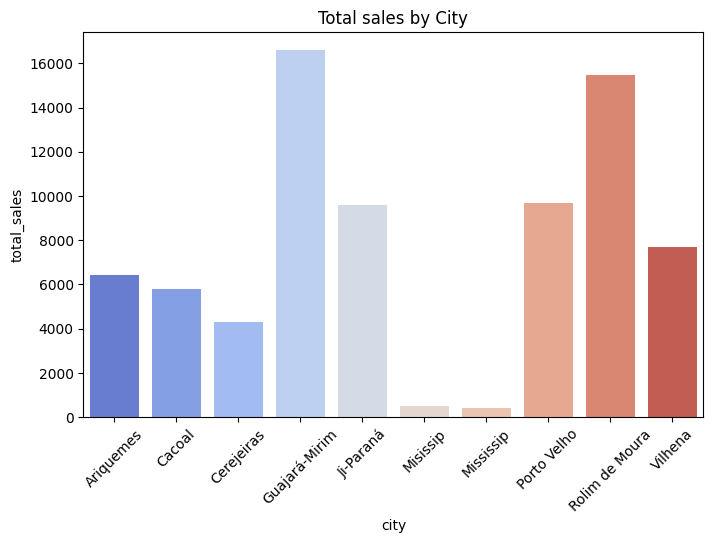

In [ ]:
query = " SELECT city, SUM(total_spent_) AS total_sales FROM customers GROUP BY city" # Consulta SQL para somar o 'total_spent_' por cidade e renomear para 'total_sales'.

df_sales = pd.read_sql(query, conn) # Carrega os totais de vendas por cidade em um DataFrame do pandas.

plt.figure(figsize = (8, 5)) # Cria uma figura para o gráfico com tamanho de 8x5 polegadas.

sns.barplot(x = "city", y = "total_sales", data = df_sales, palette = "coolwarm") # Cria um gráfico de barras usando seaborn, mostrando 'total_sales' por 'city'.

plt.xticks(rotation = 45) # Rotaciona os rótulos do eixo X em 45 graus para melhor legibilidade.

plt.title("Total sales by City") # Define o título do gráfico.

plt.show() # Exibe o gráfico.

In [ ]:
cursor.execute("""
DELETE FROM customers
WHERE city IN ('Mississip', 'Misissip')
""")

conn.commit() # Confirma a exclusão dos registros no banco de dados.

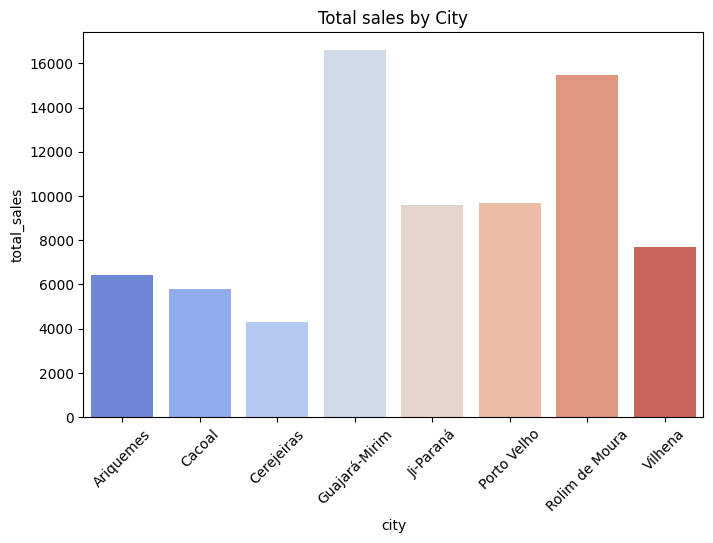

In [ ]:
query = " SELECT city, SUM(total_spent_) AS total_sales FROM customers GROUP BY city" # Recalcula a soma do 'total_spent_' por cidade após a limpeza dos dados

df_sales = pd.read_sql(query, conn) # Carrega os novos totais de vendas por cidade em um DataFrame.

plt.figure(figsize = (8, 5)) # Cria uma nova figura para o gráfico.

sns.barplot(x = "city", y = "total_sales", data = df_sales, palette = "coolwarm") # Recria o gráfico de barras com os dados atualizados.

plt.xticks(rotation = 45) # Rotaciona os rótulos do eixo X.

plt.title("Total sales by City") # Define o título do gráfico.

plt.show() # Exibe o novo gráfico, agora com os dados corrigidos.

In [ ]:
conn.close() #Encerra o sqlite